In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [2]:
data = pd.read_csv('Data/ex2data1.txt',delimiter=',',names=['exam1 score','exam2 score','Y'])
data.head()

,exam1 score,exam2 score,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = np.array(data.iloc[:,0:2])
Y = np.array(data.iloc[:,2:3])
#X = (X - np.mean(X))/(np.std(X))

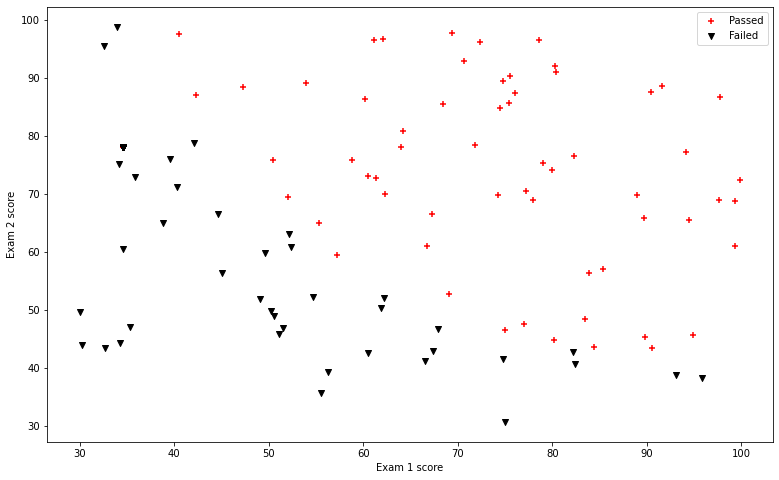

In [4]:
plt.figure(figsize=(13,8))
pos = np.argwhere(Y==1) # Returns indices of all points which have y==1
neg = np.argwhere(Y==0) #Returns indies of all points which have y==0

plt.scatter(X[pos, 0], X[pos, 1], marker='+', color='red')
plt.scatter(X[neg, 0], X[neg, 1], marker='v', color='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Passed', 'Failed'], loc='upper right', numpoints=1)
plt.show()

In [5]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

In [6]:
def costFunction(theta,x,y):
    hypothesis = sigmoid(np.dot(theta,x))
    m= y.size
    gradient = np.zeros([1,3])
    #Cost Function
    j = (-1/m) * np.sum ( np.dot(np.log(hypothesis), y) + np.dot(np.log(1-hypothesis), 1-y))
    
    grad0 = (1/m) * np.sum ((hypothesis - y.transpose()) * x[0,:] )
    grad1 = (1/m) * np.sum ((hypothesis - y.transpose()) * x[1,:] )
    grad2 = (1/m) * np.sum ((hypothesis - y.transpose()) * x[2,:] )
    gradient = np.array([grad0,grad1,grad2])
    
    return j,gradient

In [7]:
X_new = np.c_[np.ones(X.shape[0]),X].transpose()  
theta = np.zeros([1,3])

In [9]:
# To minimise our cost function we will use an inbuilt function fmin_tnc
# to give us the optimal parameters

result = opt.fmin_tnc(func=costFunction, x0=theta, args=(X_new, Y))
# x0 is the initial guess and args is the arguments that are being passed into the function 

optimal_theta = result[0]
cost_min,grad = costFunction(optimal_theta,X_new,Y)
print('Optimal theta:',optimal_theta)
print('Minimum cost:','%.5f'%cost_min)

Optimal theta: [-25.1613186    0.20623159   0.20147149]
Minimum cost: 0.20350


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631659E-01   7.89087138E-01
    2    5  5.892425235003550E-01   7.39226465E+01
    3    7  4.227824124808976E-01   1.85265901E+01
    4    9  4.072926934886755E-01   1.68671148E+01
    5   11  3.818854911164135E-01   1.07735069E+01
    6   13  3.786234844181396E-01   2.31584951E+01
tnc: stepmx = 1000
    7   16  2.389267957068805E-01   3.00821593E+00
    8   18  2.047203875515202E-01   1.52226830E-01
    9   20  2.046713888387492E-01   6.62493782E-02
   10   22  2.035303166356504E-01   9.30778549E-04
tnc: fscale = 32.7776
   11   24  2.035293525282794E-01   8.07275319E-06
   12   26  2.035251118567400E-01   1.80202688E-04
   13   28  2.034984112127999E-01   5.02866290E-04
   14   30  2.034978385050197E-01   9.93917026E-06
   15   32  2.034977909102620E-01   3.78335390E-06
   16   34  2.034977389702453E-01   1.95138140E-05
   17   36  2.034977015894747E-01   2.36014011E-13


#### We know that the **decision boundary** equation is: 
#### $Theta0$ + $Theta1$.$X$1 + $Theta2$.$X$2 = $0$  

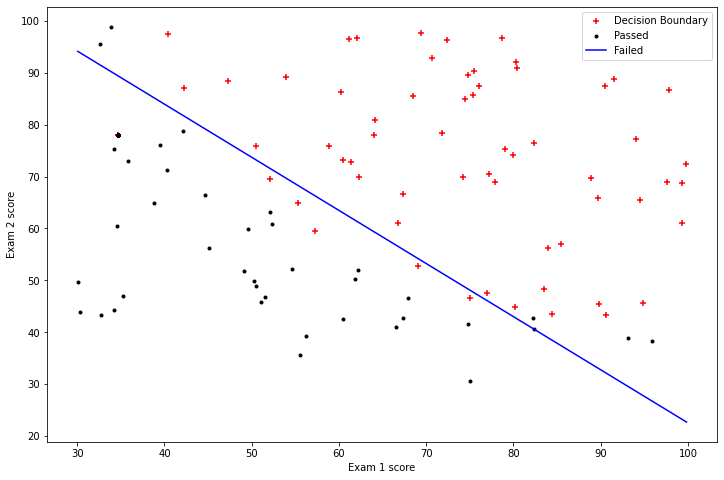

In [10]:
# Rearranging the equation we can find the slope and intercept
slope = -optimal_theta[1]/optimal_theta[2]
intercept = -optimal_theta[0]/optimal_theta[2]
xx= np.array([min(X[:,0]),max(X[:,0])]);
f_line = slope*xx + intercept;

plt.figure(figsize=(12,8))
pos = np.argwhere(Y==1) 
neg = np.argwhere(Y==0) 

plt.scatter(X[pos, 0], X[pos, 1], marker='+', color='red')
plt.scatter(X[neg, 0], X[neg, 1], marker='.', color='black')
plt.plot(xx,f_line,color='blue');

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend([ 'Decision Boundary','Passed','Failed'], loc='upper right', numpoints=1)
plt.show()

In [11]:
def predict(theta,x):
    p= sigmoid(np.dot(theta,x)) >= 0.5
    return p

In [12]:
def accuracy (a,Y):
    Y = np.squeeze(Y) 
    p = (a==Y).sum() / Y.shape[0]
    return p

In [13]:
print('Enter values for prediction')
x1 = float(input('Enter exam1 score'))
x2 = float(input('Enter exam2 score'))
x = np.array([1,x1,x2])
if predict(optimal_theta,x) == True:
    print('Passed:)')
else:
    print('Failed:(')

Enter values for prediction


Enter exam1 score 57
Enter exam2 score 78


Passed:)


In [14]:
a = predict(optimal_theta, X_new);
p = accuracy(a,Y)
print('Train Accuracy: ', p * 100);

Train Accuracy:  89.0


#### Sample of 10 predicted and actual values

In [15]:
df = pd.DataFrame({'Actual': Y.flatten(), 'Predicted': a.flatten()})
df.sample(10)

,Actual,Predicted
87,1,True
80,1,True
82,1,True
46,1,True
23,0,False
15,1,True
86,0,False
75,1,True
81,1,True
70,0,False


In [16]:
Y = np.squeeze(Y) 
count = (a!=Y).sum() 
print('Number of mis-classified values:',count)

Number of mis-classified values: 11
